In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r'C:\Users\hp\Downloads\loan_default_dataset_csv.csv', encoding='unicode_escape')  # ✓ Valid



In [6]:
print(df.head(5))

  Customer_ID  Age  Gender Marital_Status    Income  Loan_Amount  Loan_Term  \
0   CUST00001   22  Female         Single  162456.0        40452         60   
1   CUST00002   39  Female       Divorced   52569.0        12303         48   
2   CUST00003   56    Male         Single   35393.0        93806         48   
3   CUST00004   39    Male       Divorced  108165.0        96439         24   
4   CUST00005   24  Female        Married   96641.0        99656         36   

   Credit_Score  Late_Payments Previous_Default     Education  Default  
0         346.0            1.0               No  Non-Graduate      0.0  
1         362.0            0.0               No  Non-Graduate      0.0  
2         376.0            3.0               No      Graduate      1.0  
3         754.0            0.0               No  Non-Graduate      0.0  
4         312.0            2.0               No      Graduate      0.0  


In [7]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       5000 non-null   object 
 1   Age               5000 non-null   int64  
 2   Gender            5000 non-null   object 
 3   Marital_Status    5000 non-null   object 
 4   Income            4850 non-null   float64
 5   Loan_Amount       5000 non-null   int64  
 6   Loan_Term         5000 non-null   int64  
 7   Credit_Score      4850 non-null   float64
 8   Late_Payments     4850 non-null   float64
 9   Previous_Default  5000 non-null   object 
 10  Education         5000 non-null   object 
 11  Default           4565 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 468.9+ KB
None


In [13]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Customer_ID           0
Age                   0
Gender                0
Marital_Status        0
Income              150
Loan_Amount           0
Loan_Term             0
Credit_Score        150
Late_Payments       150
Previous_Default      0
Education             0
Default             435
dtype: int64


In [16]:
# Fill missing numeric values with median
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Credit_Score'] = df['Credit_Score'].fillna(df['Credit_Score'].median())
df['Late_Payments'] = df['Late_Payments'].fillna(df['Late_Payments'].median())

In [18]:
print(df.isnull().sum()) )# to check the previous command

Customer_ID           0
Age                   0
Gender                0
Marital_Status        0
Income                0
Loan_Amount           0
Loan_Term             0
Credit_Score          0
Late_Payments         0
Previous_Default      0
Education             0
Default             435
dtype: int64


In [8]:
df.dropna(subset=['Default'], inplace=True)


In [10]:
print(df.isnull().sum())# to check the previous command

Customer_ID         0
Age                 0
Gender              0
Marital_Status      0
Income              0
Loan_Amount         0
Loan_Term           0
Credit_Score        0
Late_Payments       0
Previous_Default    0
Education           0
Default             0
dtype: int64


In [11]:
# Encode categorical features manually
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Marital_Status'] = df['Marital_Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
df['Previous_Default'] = df['Previous_Default'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Non-Graduate': 0})

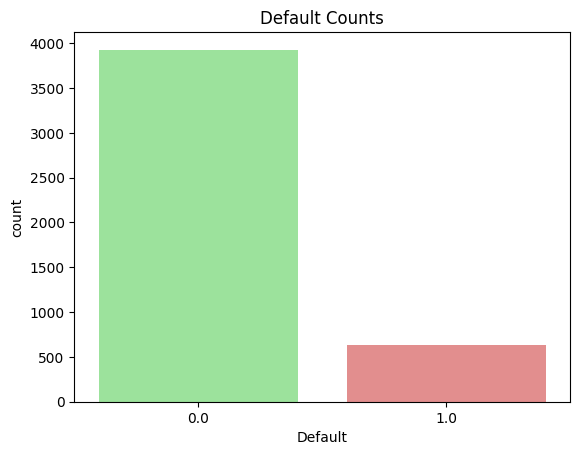

In [15]:
sns.countplot(x='Default', data=df, hue='Default', palette=['lightgreen', 'lightcoral'], legend=False)
plt.title('Default Counts')
plt.show()

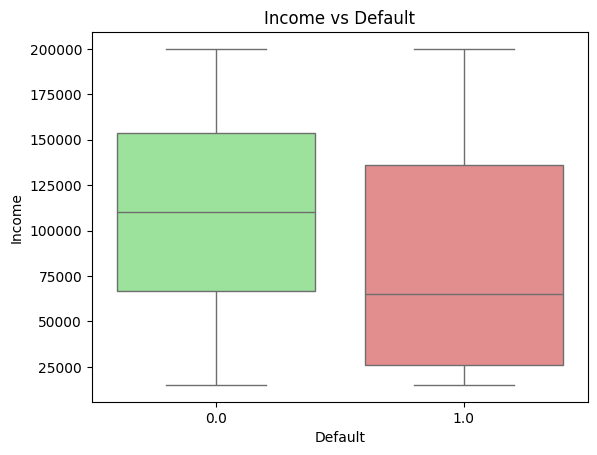

In [18]:
sns.boxplot(data=df, x='Default', y='Income', hue='Default', palette=['lightgreen', 'lightcoral'], legend=False)
plt.title('Income vs Default')
plt.show()

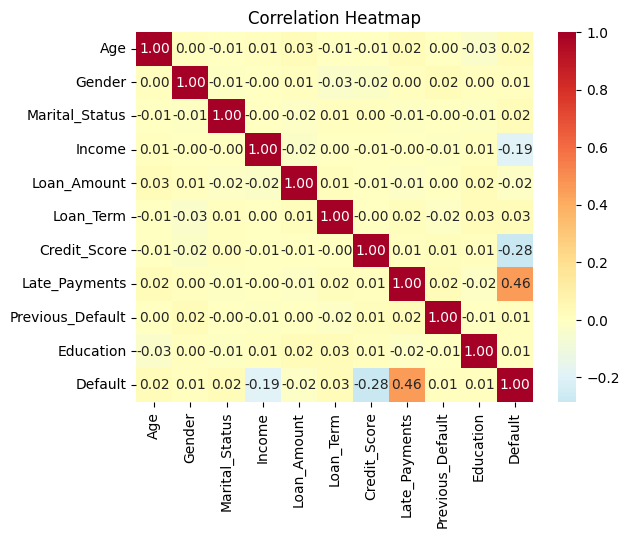

In [21]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='RdYlBu_r', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

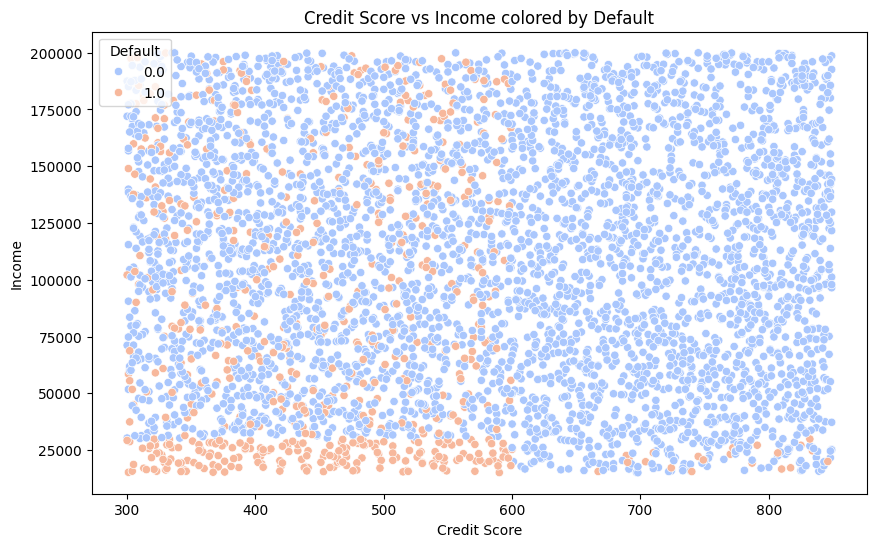

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Credit_Score', y='Income', hue='Default', palette='coolwarm')
plt.title('Credit Score vs Income colored by Default')
plt.xlabel('Credit Score')
plt.ylabel('Income')
plt.show()


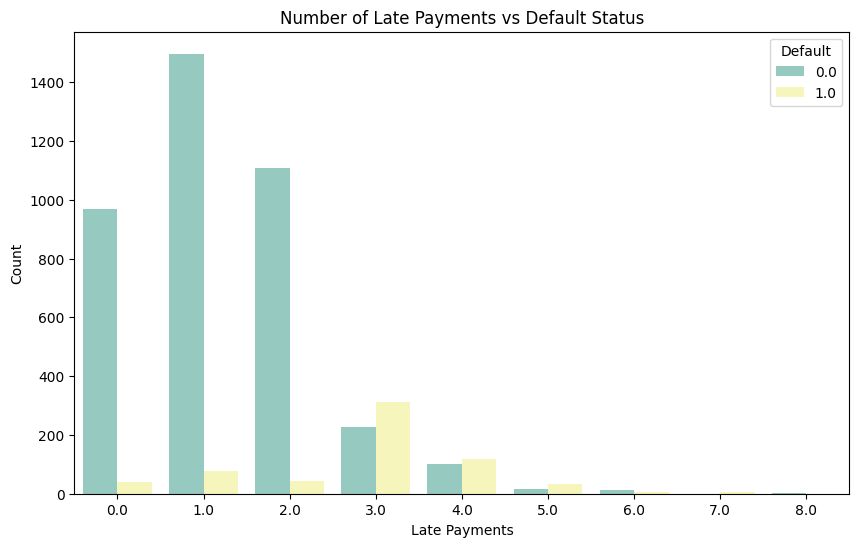

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Late_Payments', hue='Default', palette='Set3')
plt.title('Number of Late Payments vs Default Status')
plt.xlabel('Late Payments')
plt.ylabel('Count')
plt.show()


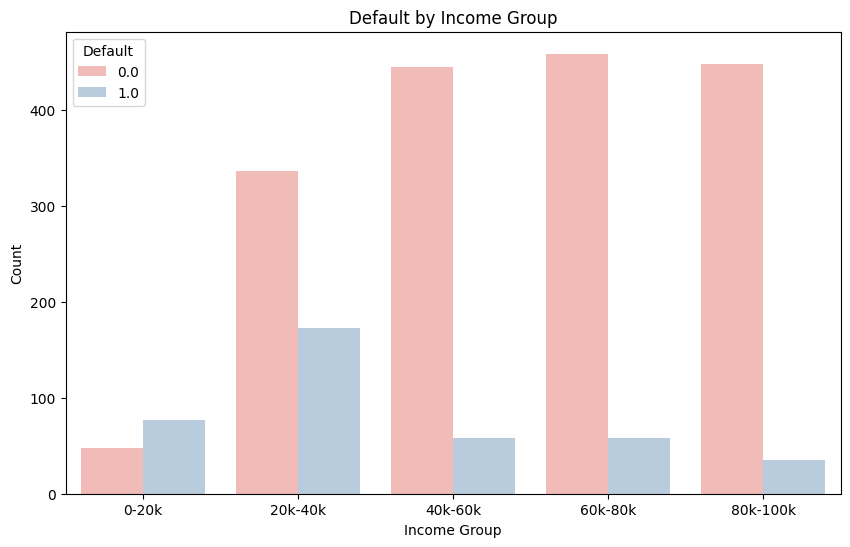

In [26]:
df['Income_Group'] = pd.cut(df['Income'], bins=[0, 20000, 40000, 60000, 80000, 100000], 
                            labels=['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k'])

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Income_Group', hue='Default', palette='Pastel1')
plt.title('Default by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.show()


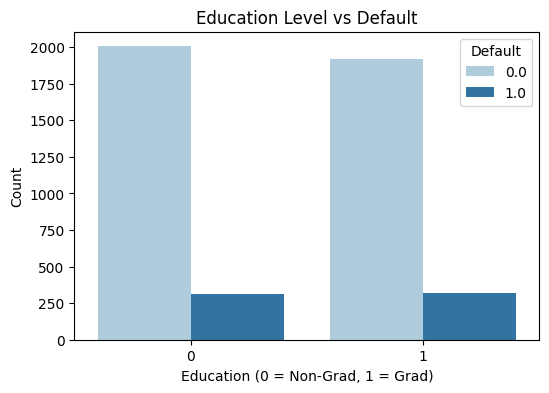

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Education', hue='Default', palette='Paired')
plt.title('Education Level vs Default')
plt.xlabel('Education (0 = Non-Grad, 1 = Grad)')
plt.ylabel('Count')
plt.show()


In [28]:
# Manual model
def risk_flag(row):
    score_flag = row['Credit_Score'] < 650
    late_flag = row['Late_Payments'] > 1
    income_flag = row['Income'] < 40000
    prev_default = row['Previous_Default'] == 1
    low_education = row['Education'] == 0

    # More flexible and inclusive logic
    if (score_flag and (late_flag or income_flag)) or prev_default or low_education:
        return 1
    return 0
df['Predicted_Default'] = df.apply(risk_flag, axis=1)


In [29]:
# Confusion matrix components
TP = len(df[(df['Default'] == 1) & (df['Predicted_Default'] == 1)])
TN = len(df[(df['Default'] == 0) & (df['Predicted_Default'] == 0)])
FP = len(df[(df['Default'] == 0) & (df['Predicted_Default'] == 1)])
FN = len(df[(df['Default'] == 1) & (df['Predicted_Default'] == 0)])

print("Confusion Matrix:")
print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")

# Manual accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy:.2f}")

#  Precision, Recall, F1
precision = TP / (TP + FP) if (TP + FP) else 0
recall = TP / (TP + FN) if (TP + FN) else 0
f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) else 0

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Confusion Matrix:
TP: 633, FP: 3167, TN: 761, FN: 4
Accuracy: 0.31
Precision: 0.17
Recall: 0.99
F1 Score: 0.29


### Conclusion:

*Young unmarried individuals with low income, poor credit scores, and frequent late payments are more likely to default on loans. Applicants with a history of previous defaults and low education levels also show higher risk. These insights can help in early identification and mitigation of financial risk for lenders.*
